<p class="title">Wald's Sequential Probability Ratio Test</p>

## Sequential test: draw data sequentially

Sequence of data $X_1, X_2, \ldots$. 

Two hypotheses, $H_0$ and $H_1$, each of which completely specifies the joint distribution of the data.

Assume that the joint distributions under $H_0$ and $H_1$ are absolutely continuous with respect to each other, relative to some underlying measure.

Let $f_{0m}$ be the likelihood of $H_0$ for data $(X_j)_{j=1}^m$ and let $f_{1m}$ be the likelihood of $H_1$ for data $(X_j)_{j=1}^m$.

The likelihood ratio of $H_1$ to $H_0$ is $f_{1m}/f_{0m}$; this is (loosely speaking) the probability of observing $X_1, \ldots, X_m$ if $H_1$ is true, divided by the probability of observing $X_1, \ldots, X_m$ if $H_0$ is true.

The probability of observing the data actually observed will tend to be higher for whichever
hypothesis is in fact true, so this likelihood ratio will tend to be greater than $1$ if $H_1$ is true,
and will tend to be less than $1$ if $H_0$ is true.
The more observations we make, the more probable it is that the
resulting likelihood ratio will be small if $H_0$ is true.
Wald (1945) showed that if $H_0$ is true, then the probability is at most $\alpha$
that the likelihood ratio
is ever greater than $1/\alpha$, no matter how many observations are made.
More generally, we have:
<p class="gap01"></p>

<div class="theorem"> Wald's SPRT

<p>For any $\alpha \in (0, 1)$ and $\beta \in [0, 1)$, the following sequential 
    algorithm tests the hypothesis $H_0$ at level no larger than 
   $\alpha$ and with power at least $1-\beta$
   against the alternative $H_1$.
</p>

<p>
   Set $m=0$.
</p> 

   <ol>
     <li> Increment $m$
     <li> If $\frac{f_{1m}}{f_{0m}} \ge \frac{1-\beta}{\alpha}$, stop and reject $H_0$.</li>
     <li> If $\frac{f_{1m}}{f_{0m}} \le \frac{\beta}{1-\alpha}$, stop and do not accept $H_0$.</li>
     <li> If $\frac{\beta}{1-\alpha} < \frac{f_{1m}}{f_{0m}} < \frac{1-\beta}{\alpha}$, go to step 1.  </li>
   </ol>
  
</div>

## SPRT miracle

Don't need to know the distribution of the likelihood ratio $\mbox{LR}=\frac{f_{1m}}{f_{0m}}$ under the null hypothesis
to find the critical values for the test.

## Connection to Gambler's ruin

For iid data, the likelihood ratio is a product of terms. On a log scale, it's a sum.  Each "trial" produces another term in the sum, positive or negative. But&mdash;unlike the classical Gambler's Ruin problem in which the game is fair&mdash;the terms are not equal in magnitude: the steps are not all the same size.

## Likelihood ratio for two values of $p$ in iid Bernoulli trials

Suppose $X_1, X_2, \ldots,$ are iid $\mbox{Bernoulli}(p)$ random variables
and let $p_1 > p_0$.

Set $\mbox{LR} \leftarrow 1$ and $j \leftarrow 0$.

 + Increment $j$
 + If $X_j = 1$, $\mbox{LR} \leftarrow \mbox{LR} \times p_1/p_0$. 
 + If $X_j = 0$, $\mbox{LR} \leftarrow \mbox{LR} \times (1-p_1)/(1- p_0)$.

What's $\mbox{LR}$ at stage $m$?
Let $T_m \equiv \sum_{j=1}^m X_j$.
$$
     \frac{p_{1m}}{p_{0m}} \equiv 
         \frac{p_1^{T_m}(1-p_1)^{m-T_m}}{p_0^{T_m}(1-p_0)^{m-T_m}}.
$$
This is the ratio of binomial probability when $p = p_1$ to binomial probability when
$p = p_0$ (the binomial coefficients in the numerator and denominator cancel).




<div class="callout">

<p class="subtitle">Wald's SPRT for $p$ in iid Bernoulli trials</p>

Conclude $p > p_0$ if 
$$
     \frac{p_{1m}}{p_{0m}} \ge \frac{1-\beta}{\alpha}.
$$
Conclude $p \le p_0$ if
$$
     \frac{p_{1m}}{p_{0m}} \le \frac{\beta}{1-\alpha}.
$$
Otherwise, draw again.

</div>

The SPRT approximately minimizes the 
expected sample size
when $p \le p_0$ or $p > p_1$.
For values in $(p_1, p_0)$, it can have larger sample sizes than fixed-sample-size tests.

## Simulation of SPRT for Binomial

Let's watch the SPRT in action for iid Bernoulli trials.

In [1]:
# This is the first cell with code: set up the Python environment
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy as sp
import scipy.stats
from scipy.stats import binom
import pandas as pd
# For interactive widgets
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import clear_output, display, HTML

<function __main__.plotBinomialSPRT>

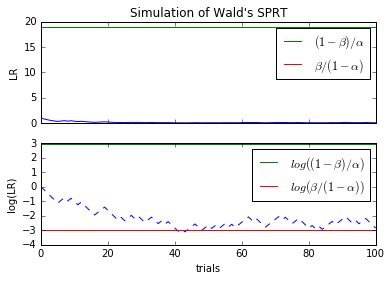

In [2]:
def plotBinomialSPRT(n, p, p0, p1, alpha, beta):
    '''
       Plots the progress of the SPRT for n iid Bernoulli trials with probabiity p
       of success, for testing the hypothesis that p=p0 against the hypothesis p=p1
       with significance level alpha and power 1-beta
    '''
    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
    trials = sp.stats.binom.rvs(1, p, size=n+1)  # leave room to start at 1
    terms = np.ones(n+1)
    sfac = p1/p0
    ffac = (1.0-p1)/(1.0-p0)
    terms[trials == 1.0] = sfac
    terms[trials == 0.0] = ffac
    terms[0] = 1.0
    logterms = np.log(terms)
    #
    ax[0].plot(range(n+1),np.cumprod(terms), color='b')
    ax[0].axhline(y=(1-beta)/alpha, xmin=0, xmax=n, color='g', label=r'$(1-\beta)/\alpha$')
    ax[0].axhline(y=beta/(1-alpha), xmin=0, xmax=n, color='r', label=r'$\beta/(1-\alpha)$')
    ax[0].set_title('Simulation of Wald\'s SPRT')
    ax[0].set_ylabel('LR')
    ax[0].legend(loc='best')
    #
    ax[1].plot(range(n+1),np.cumsum(logterms), color='b', linestyle='--')
    ax[1].axhline(y=math.log((1-beta)/alpha), xmin=0, xmax=n, color='g', label=r'$log((1-\beta)/\alpha)$')
    ax[1].axhline(y=math.log(beta/(1-alpha)), xmin=0, xmax=n, color='r', label=r'$log(\beta/(1-\alpha))$')
    ax[1].set_ylabel('log(LR)')
    ax[1].set_xlabel('trials')
    ax[1].legend(loc='best')


interact(plotBinomialSPRT, n=widgets.IntSlider(min=5, max=300, step=5, value=100),\
         p=widgets.FloatSlider(min=0.001, max=1, step=0.01, value=.45),\
         p0=widgets.FloatSlider(min=0.001, max=1, step=0.01, value=.5),\
         p1=widgets.FloatSlider(min=0.001, max=1, step=0.01, value=.6),\
         alpha=widgets.FloatSlider(min=0.001, max=1, step=0.01, value=.05),\
         beta=widgets.FloatSlider(min=0.001, max=1, step=0.01, value=.05)
         )

## Behavior
For $p_0 < p_1$,
+ when $p \ge p_1$, the likelihood ratio is likely to cross the upper (green) line eventually and unlikely to cross the lower (red) line.
+ when $p \le p_0$, the likelihood ratio is likely to cross the lower (red) line eventually and unlikely to cross the upper (green) line.
+ the SPRT approximately minimizes the expected number of trials before rejecting one or the other hypothesis, provided $p \notin (p_0, p_1)$.

For $p_1 < p_0$, the directions are reversed.

## It works for $\beta = 0$ too: $P$-values
The inequalities hold when $\beta = 0$ also. Then the likelihood ratio has chance at most $\alpha$ of ever being greater than $1/\alpha$, if in fact $p > p_0$.

Hence, $1/\mbox{LR}$ is the $P$-value of the hypothesis $p > p_0$. This can be used to construct one-sided confidence bounds for $p$ and other parameters. The next chapter does exactly that, to find a lower confidence bound for the mean of a nonnegative population.

## What's next?
+ [Next: The Kaplan-Wald Confidence Bound for a Nonnegative Mean](kaplanWald.ipynb)
+ [Lower confidence bounds for the mean of a nonnegative population: Markov's Inequality & methods based on the empirical distribution](markov.ipynb)
+ [Index](index.ipynb)

In [3]:
%run talkTools.py